In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url="https://www.linkedin.com/jobs/search?keywords=Web%20Developer&location=New%20Delhi%2C%20Delhi%2C%20India&trk=guest_job_search_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0"

In [4]:
response=requests.get(url)

In [5]:
response

<Response [200]>

In [6]:
data=response.text

In [7]:
data

'<!DOCTYPE html><html lang="en"><head><meta name="pageKey" content="d_jobs_guest_search"><meta name="linkedin:pageTag" content="urlType=jserp_custom;emptyResult=false"><meta name="locale" content="en_US"><meta id="config" data-app-id="com.linkedin.jobs-guest-frontend.d_web" data-custom-tracking-code="" data-tracking-page-type=""/><link rel="canonical" href="https://in.linkedin.com/jobs/web-developer-jobs-new-delhi"><link rel="icon" href="https://static-exp1.licdn.com/scds/common/u/images/logos/favicons/v1/favicon.ico"><script>function getDfd() {let yFn,nFn;const p=new Promise((y, n)=>{yFn=y;nFn=n;});p.resolve=yFn;p.reject=nFn;return p;}window.lazyloader = getDfd();window.tracking = getDfd();window.impressionTracking = getDfd();window.ingraphTracking = getDfd();</script><script src="https://static-exp1.licdn.com/sc/h/et6rotg4cb3i11cgzpc39e7iw" async></script><meta name="description" content="Today&rsquo;s top 3,000+ Web Developer jobs in New Delhi, Delhi, India. Leverage your profession

In [8]:
soup=BeautifulSoup(data,'html.parser')

In [9]:
jobs=soup.find_all('li',{'class':'result-card job-result-card result-card--with-hover-state'})
npo_jobs={}
job_no=0

In [10]:
jobs

[<li class="result-card job-result-card result-card--with-hover-state" data-column="1" data-entity-urn="urn:li:jobPosting:2166919056" data-id="2166919056" data-row="1" data-search-id="a6ebbaa0-376d-4dd6-8c3c-44abed521ed0" data-tracking-id="jVeYQFqESjmreQZ0ppXN9w=="><a class="result-card__full-card-link" data-tracking-control-name="public_jobs_job-result-card_result-card_full-click" data-tracking-will-navigate="" href="https://in.linkedin.com/jobs/view/web-developer-at-m-o-l-e-d-r-o-%C2%AE-2166919056?refId=a6ebbaa0-376d-4dd6-8c3c-44abed521ed0&amp;position=1&amp;pageNum=0&amp;trk=public_jobs_job-result-card_result-card_full-click"><span class="screen-reader-text">Web Developer</span></a><img alt="M O L E D R O ®" aria-hidden="true" class="artdeco-entity-image job-result-card artdeco-entity-image--company job-result-card--company artdeco-entity-image--square-4 job-result-card--square-4 result-card__image lazy-load" data-delayed-url="https://media-exp1.licdn.com/dms/image/C4D0BAQHXJrUx3DFt

In [11]:
for job in jobs:
    title = job.find('h3',{'class':'result-card__title job-result-card__title'}).text
    company = job.find('h4',{'class':'result-card__subtitle job-result-card__subtitle'}).text
    location_tag = job.find('span',{'class':'job-result-card__location'})
    location = location_tag.text if location_tag else "N/A"
    job_no+=1
    npo_jobs[job_no]=[title,company,location]
    
    print('Job Title:', title, '\nCompany:',company, '\nLocation : ', location, '\n---')

    

Job Title: Web Developer 
Company: M O L E D R O ® 
Location :  New Delhi, Delhi, India 
---
Job Title: Web Developer 
Company: Aarambhh Digital 
Location :  Noida, Uttar Pradesh, India 
---
Job Title: Web Developer 
Company: Filmeraa 
Location :  Delhi, Delhi, India 
---
Job Title: Frontend Web Developer 
Company: Satya Infosys 
Location :  New Delhi, Delhi, India 
---
Job Title: Web Developer 
Company: PerkMinds 
Location :  New Delhi, Delhi, India 
---
Job Title: Web Developer 
Company: idYAY Creations Pvt. Ltd. 
Location :  New Delhi, Delhi, India 
---
Job Title: Web Designer and Developer 
Company: Nimble 
Location :  Delhi, Delhi, India 
---
Job Title: Frontend Developer 
Company: Sprinklr 
Location :  Gurgaon, Haryana, India 
---
Job Title: Web Developer 
Company: Technoplanet 
Location :  Faridabad, Haryana, India 
---
Job Title: Web Developer 
Company: Jhingalala.in 
Location :  New Delhi, Delhi, India 
---
Job Title: Web Developer 
Company: First Point Creations 
Location :  

In [12]:
print("Total Jobs:", job_no)
npo_jobs_df = pd.DataFrame.from_dict(npo_jobs, orient='index', columns=['Job Title','Company','Location'])

npo_jobs_df.head()


Total Jobs: 25


,Job Title,Company,Location
1,Web Developer,M O L E D R O ®,"New Delhi, Delhi, India"
2,Web Developer,Aarambhh Digital,"Noida, Uttar Pradesh, India"
3,Web Developer,Filmeraa,"Delhi, Delhi, India"
4,Frontend Web Developer,Satya Infosys,"New Delhi, Delhi, India"
5,Web Developer,PerkMinds,"New Delhi, Delhi, India"


In [13]:
npo_jobs_df.to_csv('npo_jobs.csv')

In [14]:
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('npo_jobs.csv')

In [27]:
df.rename(columns={'Job Title':'JobTitle'},inplace=True)

In [28]:
df.head()

,Unnamed: 0,JobTitle,Company,Location
0,1,Web Developer,M O L E D R O ®,"New Delhi, Delhi, India"
1,2,Web Developer,Aarambhh Digital,"Noida, Uttar Pradesh, India"
2,3,Web Developer,Filmeraa,"Delhi, Delhi, India"
3,4,Frontend Web Developer,Satya Infosys,"New Delhi, Delhi, India"
4,5,Web Developer,PerkMinds,"New Delhi, Delhi, India"


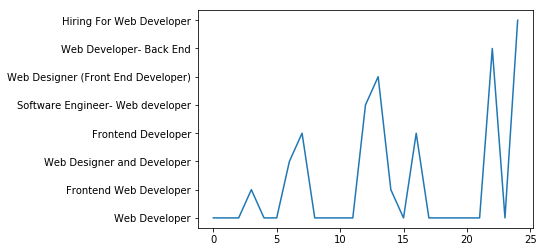

In [29]:
plt.plot(df.JobTitle)